In [3]:
# data manipilation
import pandas as pd
import numpy as np

import json

# plot
import matplotlib.pyplot as plt

# functions
from functions.functions import *

In [4]:
# loading data
with open('data\wordsapi_sample.json') as json_file:
    data_lex = json.load(json_file)

with open("Data\wordle-nyt-allowed-guesses.txt", "r", newline="\n") as guess:
    data_guess = guess.read().splitlines()

with open("Data\wordle-nyt-answers-alphabetical.txt", "r", newline="\n") as awn:
    data_awn = awn.read().splitlines()

# create word list from dictionary entries
word_list = list(data_lex.keys())

In [5]:
lex_clean = by_size(word_list,5)

In [6]:
merge_list = lex_clean + data_guess + data_awn
print(len(merge_list))
clean_list = list(set(merge_list))
print(len(clean_list))

13928
13316


In [7]:
letter = count_letters(clean_list)

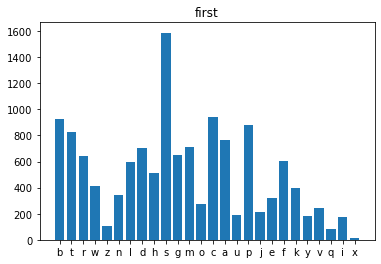

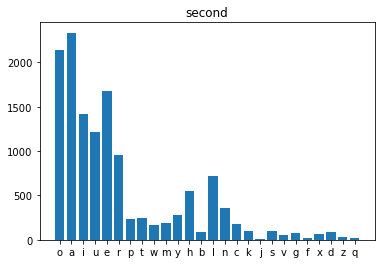

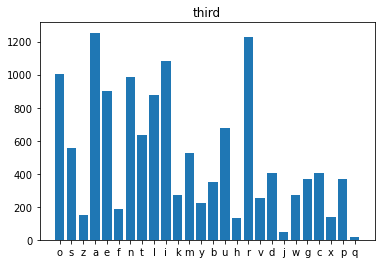

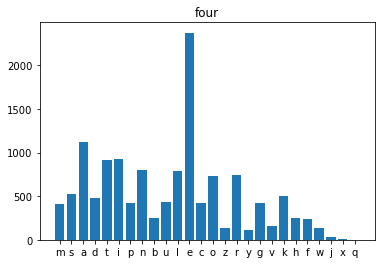

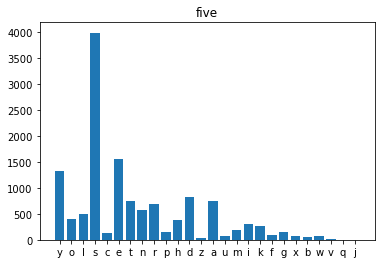

In [8]:
for p in letter:
    title_list = ["first","second","third","four","five"]
    plt.bar(list(letter[p].keys()), letter[p].values())
    plt.title(title_list[p])
    plt.show()

In [9]:
word_rated, word_begin = rate_word(clean_list,letter)
sorted(list(word_begin.values()), reverse= True)
list(word_begin.keys())[list(word_begin.values()).index(10862)]


'cares'

In [10]:
class Game:
    def __init__(self):
        self.line = 0
        self.correct_wrong = dict() # dictonary of lists    {"s",l}
        self.correct = dict()       # dictonary of integers {"s",i}
        self.wrong = []             # list of stings ["s"]
    
    def guess(self, string_guess):
        self.line += 1

    
        


In [11]:
guess_1 = "cares"

In [12]:
in_let = {"e":[],"c":[1],"h":[2]}
correct_let = {"e":3}
worng_let = ["b","a","t","y","r","i","v","r","p","o","w","m","u","l","s","d"] #,"h","t","l","i","g","m","b"

In [13]:
len(clean_list)

13316

In [14]:
def word_list_adjust(privious_list, dict_correct_wrong, list_worng, dict_correct):
    filter_correct = []
    # keep words which contain the correct letters
    for letter in dict_correct_wrong.keys():
        if len(filter_correct) == 0:
            filter_correct = [word for word in privious_list if letter in word]
        else:
            cache = [i for i in privious_list if letter in i]
            filter_correct = [element for element in filter_correct if element in cache]

    # delete words from list containing worng letters
    word_list = []
    for l in range(len(list_worng)):
        if len(word_list) == 0:
            word_list = [i for i in filter_correct if list_worng[l] not in i]
        else:
            cache = [i for i in filter_correct if list_worng[l] not in i]
            word_list = [element for element in word_list if element in cache]

    # removing words with check letters in worng spot
    proof = len(word_list)-1
    while len(word_list) != proof:
        print(len(word_list))
        proof = len(word_list)
        for letter in dict_correct_wrong.keys():
            # print(letter)
            for postion in dict_correct_wrong[letter]:
                print(postion)
                for word in word_list:
                    # if word == "isbas":
                    #     print("Fuck",postion, word.index(letter))
                    # if dict_correct_wrong[letter][postion] == word.index(letter):
                    #     word_list.remove(word)
                    if postion == word.index(letter):
                        word_list.remove(word)
    fucking_list = word_list.copy()
    for letter in dict_correct.keys():
        print(letter)
        # print(letter)
        print(fucking_list)
        print("\n")
        for word in fucking_list:
            print(word)
            if word == "isbas":
                print("Fuck",dict_correct[letter], word.index(letter))
            if dict_correct[letter] != word.index(letter):
                fucking_list.remove(word)

    
    return fucking_list 

list_2 = word_list_adjust(clean_list,in_let,worng_let,correct_let)

len(list_2)

6
1
2
e
['check', 'hence', 'keech', 'hench', 'kench', 'cheek']


check
keech
kench


3

In [15]:
list_2

['hence', 'hench', 'cheek']

In [16]:
for letter in correct_let.keys():
        # print(letter)
        for word in list_2:
            if correct_let[letter] != word.index(letter):
                list_2.remove(word)

len(list_2),list_2


(1, ['hench'])

In [17]:
letter_rate_2 = count_letters(list_2)

In [107]:
l, s = rate_word(list_2,letter_rate_2)

In [108]:
s

{'check': 4}

In [109]:
number = sorted(list(s.values()), reverse= True)[0]
sorted(list(s.values()), reverse= True)

list(s.keys())[list(s.values()).index(number)]

'check'

In [110]:
# sorted(list(s.values()), reverse= True)

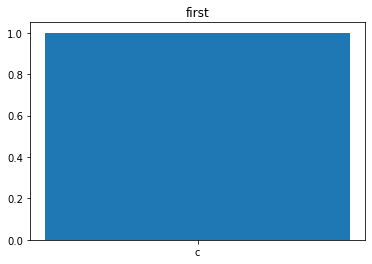

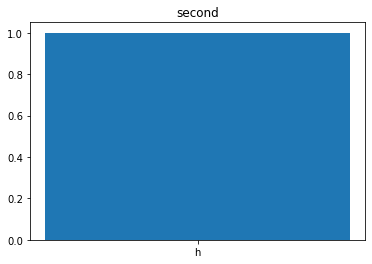

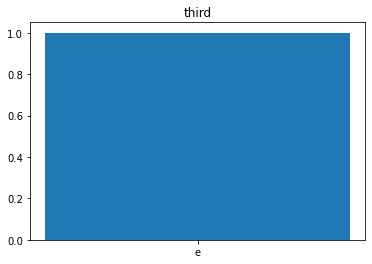

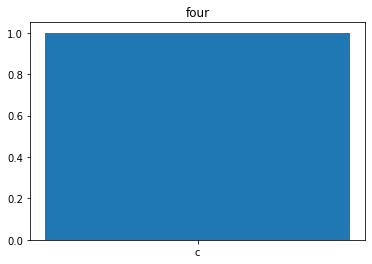

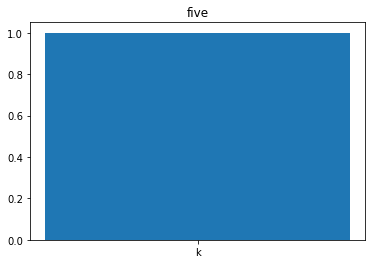

In [111]:
for p in letter_rate_2:
    title_list = ["first","second","third","four","five"]
    plt.bar(list(letter_rate_2[p].keys()), letter_rate_2[p].values())
    plt.title(title_list[p])
    plt.show()